# Least Square With Optimality Certificate

The least square formulation is a very common optimization problem arising in many fields of engineering and science.
Its success comes from the fact that it has a nice Bayesian interpretation (TODO).

Assuming $A$ is a linear operator whose matrix is of size $n\times k$, the linear least square reads:

\begin{align*}
    \underset{x \in \mathbb{R}^k}{min} \quad \frac{1}{2} \|Ax-y\|_2^2
\end{align*}

With $y \in \mathbb{R}^k$.
From the Forward/Backward proximal spliting framework seen in the notebook called "ForwardBackwardDual", we introduced an algorithm that allows to compute a solution to both the primal and the dual problem. In order to apply this method on the simple linear, least square, we will derive proper convex conjugate in the proper settings.

## Proximal splitting framework
First, we will use the following formulation for the Forward-Backward proximal splitting method:

\begin{align*}
    \underset{x \in \mathbb{R}^k}{min} \quad f(x) + g(Ax)
\end{align*}

Where f and g should be convex functionals. In our case, we identify $f$ as a trivial function: $f(x)=0$, and g as $g(x) = \frac{1}{2} \|x-y\|_2^2$

In this case, the Fenchel-Rockafellar theorem shows that one can solve the following _dual problem_

\begin{align*}
    \underset{u \in \mathbb{R}^n}{min} \quad f^*( -L^* u ) + g^*(u)
\end{align*}

and recover the unique solution $x^\star$ of the primal problem from a (non-necessarily unique) solution $u^\star$ of the dual problem, as

\begin{align*}
    x^\star = \nabla f^*( -L^* u^\star )
\end{align*}

## Chambolle Pock algorithm

In order to solve the problem exposed earlier, we will use the Chambolle-Pock strategy which reads:

Take an initial estimates $x^{0}$ and $u^{0}$ of the primal and dual solutions, a parameter $\tau>0$, a second parameter $\sigma>0$ such that $\sigma \tau \|A\|^2 < 1$, and a relaxation parameter $0<\rho<2$, and iterates, for $k=1,2,\ldots$:

\begin{align}
    u^{k} &= \mathrm{prox}_{\sigma g^*}( u^{k-1} + \sigma L(\tilde{x}^{k-1}) \\
    x^{k} &= \mathrm{prox}_{\tau f}(  x^{k-1}-\tau L^* u^{k} ) \\
    \tilde{x}^{k} &= x^{k} + \rho (x^{k}-x^{k-1})\\
\end{align}
  
Where, $x^{k}$ converges to a primal solution $x^\star$ and $u^{k}$ converges to a dual solution $u^\star$.

## Deriving the convex Conjugate

### Convex conjugate of $f$

We recall that we would like to instanciate the forward backward scheme for $f$ a trivial function: $f(x)=0$.
The convex conjugate of $f$ reads:

\begin{align*}
    f^*(u)= \underset{z}{max} \quad \langle u, z \rangle_{\mathbb{R}^n}
\end{align*}

This function has a non finite value ($+\infty$) for every non zero value of $u$. Such function reduces to the constraint $u=0$ that translate into the indicator function of the $\vec{0}$ vector : $\delta_0(u)$

### Convex conjugate of $g$

We recall that we would like to instanciate the forward backward scheme for $g$ as $g(x) = \|x-y\|_2^2$.
The convex conjugate of $g$ reads:

\begin{align*}
    g^*(u) &= \underset{z}{max} \quad \langle u, z \rangle_{\mathbb{R}^n} - \frac{1}{2} \|z-y\|_2^2 \\
\end{align*}

Where $c(z) = \langle u, z \rangle_{\mathbb{R}^n} - \frac{1}{2} \|z -y\|_2^2$ is a nice concave function that is differentiable, let's see where its derivative vanishes:
 
\begin{align}
    \frac{\partial c}{\partial z} &= 0\\
    \frac{\partial \langle u, z \rangle }{\partial z} - \frac{1}{2} \left(
    \frac{\partial \langle z, z \rangle }{\partial z} +
    \frac{\partial \langle y, y \rangle }{\partial z} - 2
    \frac{\partial \langle z, y \rangle }{\partial z} \right) &= 0\\
    u - z + y &= 0\\
    z = u + y
\end{align}
 
Now that we have found the optimum, we can express the convex conjugate $g^*(u)$:
 
 \begin{align}
  g^*(p) &= c(u + y)\\
  &= \langle u,u + y \rangle - \frac{1}{2}\| u + y - y \|_2^2\\
  &= \|u\|_2^2 + \langle u, y \rangle - \frac{1}{2}\|u\|^2 \\
  &= \frac{1}{2}\|u\|^2 + \langle u, y \rangle_{\mathbb{R}^n}
 \end{align}

## Deriving the proximity operator of $g^*$

The proximity operator of $g$ reads:

\begin{equation}
    prox_{\gamma g^*}(u) = \underset{z}{argmin} \quad \frac{1}{2\gamma} \|u-z\|_2^2 + \frac{1}{2} \|z\|^2 +
\langle z, y \rangle_{\mathbb{R}^n}
\end{equation}

Where $d(z) = \frac{1}{2\gamma} \|u-z\|_2^2 + \left( \frac{1}{2} \|z\|^2 + \langle z, y \rangle_{\mathbb{R}^n} \right)$ is a nice convex function that is differentiable, let's see where its derivative vanishes:

\begin{align}
    \frac{\partial d}{\partial z} &= 0\\
    \frac{1}{2\gamma} \left(
        \frac{\partial \langle u, u \rangle }{\partial x} +
        \frac{\partial \langle z, z \rangle }{\partial x} - 2
        \frac{\partial \langle u, z \rangle }{\partial x} \right) +
        \frac{1}{2}\frac{\partial \langle z, z \rangle }{\partial x} +
        \frac{\partial \langle z, y \rangle }{\partial x} &= 0\\
    \frac{z-u}{\gamma} + z + y &=0\\
    \left( \frac{\gamma+1}{\gamma} \right) z - \frac{1}{\gamma} u + y &= 0\\
    z &= \frac{u-\gamma y}{\gamma+1}
\end{align}
 
 Now, we have the following proximity operator:
 \begin{equation}
   prox_{\gamma g^*}(u) = \frac{u-\gamma y}{\gamma+1}
 \end{equation}

## Wrapping up

We are now able to give the dual problem of the original least square problem:
 
\begin{align}
    \underset{u \in \mathbb{R}^n}{max} \quad & -f^*(-A^*u) - g^*(u)\\
    \underset{u \in \mathbb{R}^n}{max} \quad & -\delta_{0}(-A^* u) -
      \frac{1}{2} \|u\|^2 - \langle u, y \rangle_{\mathbb{R}^n} \\
    \underset{u \in \mathbb{R}^n}{max} \quad & -\frac{1}{2} \|u\|^2 - \langle u, y \rangle_{\mathbb{R}^n} \quad \text{such that} \quad A^* u = 0 \\
\end{align}
 
A really interesting property for the meticulous data scientist, is that we can now actually measure the primal-dual gap for the current set of primal-dual solution:
 
\begin{equation}
  PD(x,u) = \|Ax-y\|_2^2 + \frac{1}{2} \|u\|^2 + \langle u, y \rangle_{\mathbb{R}^n}
\end{equation}
 
 A primal-dual gap numerically close to zero can be considered as an optimality certificate.

## Numerical experiment

We will now try to perform an unregularized deconvolution algorithm

In [55]:
#math and linear algebra stuff
import numpy as np
from skimage import measure
from scipy import misc
import scipy.signal as scis
%matplotlib inline
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

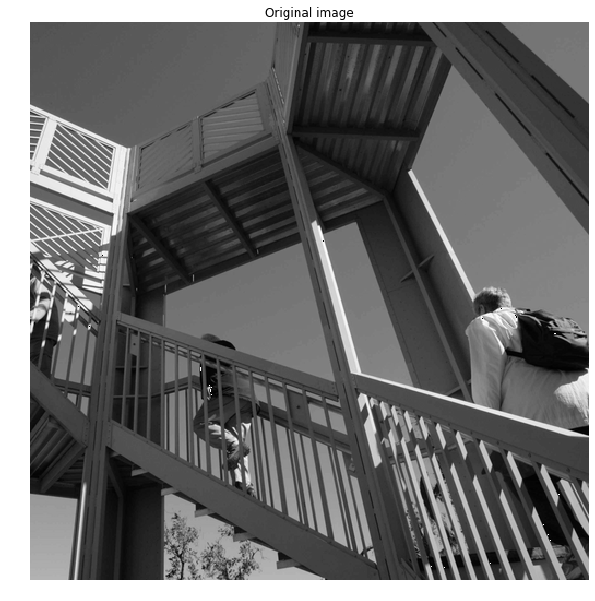

In [56]:
"""
  import dataset, and convert to fp32
"""
xbar = misc.ascent().astype(np.float64)
dyn = xbar.ptp()
#Plot
plt.figure(0,figsize=(10,10))
plt.title("Original image")
plt.imshow(xbar,interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")

(-0.5, 10.5, 10.5, -0.5)

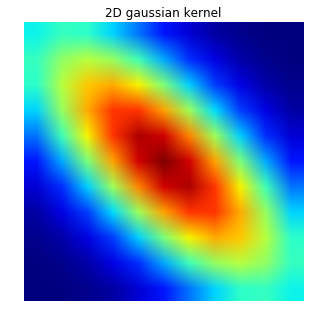

In [57]:
"""
  Define a 2D, non axis aligned gaussian kernel, and its time reversed version
"""
#define mesh
sizeK = 11 # must be odd
X,Y=np.meshgrid(np.linspace(-1,1,sizeK),np.linspace(-1,1,sizeK))
xvec = np.array([np.reshape(X,X.size),np.reshape(Y,Y.size)])
#define a 2D rotation matrix:
def GetRotMat( theta ):
  return np.array([[np.cos(theta),-np.sin(theta)],
    [np.sin(theta),np.cos(theta)]])
Mrot = GetRotMat( 3.*np.pi/4. )
#define anisotropic and rotated gaussian
Sigma = np.dot(Mrot,np.dot(np.diag([0.15,1]),Mrot.T))
mu = np.array([[0],[0]])
coef = 1/np.sqrt(np.power(2*np.pi,2)*np.linalg.det(Sigma))
#2-dimensional gaussian pdf
test=np.dot(np.linalg.inv(Sigma),xvec-mu)
K=coef * np.exp(-0.5* np.sum(test*(xvec-mu),0))
K=np.reshape(K,X.shape)/K.sum()
#Normalize
K/=K.sum()
KT=K[::-1,::-1]

#Plot it
plt.figure(1,figsize=(5,5))
plt.title("2D gaussian kernel")
plt.imshow(K)
plt.axis("off")

In [58]:
"""
 Check that AT and T are adjoint of each other
"""
#A can be an arbitrary linear operator, here it is the blurring operator
A = lambda x : scis.convolve2d(x, K, mode='same', boundary='symm', fillvalue=0)
AT = lambda x : scis.convolve2d(x, KT, mode='same', boundary='symm', fillvalue=0)

a = np.random.uniform(1,4,xbar.shape)
b = np.random.uniform(1,4,xbar.shape)

#check that <ATa,b> = <a,Ab>
ATa = np.dot(AT(a).flatten(),b.flatten())
aAb = np.dot(a.flatten(),A(b).flatten())
assert( np.isclose(ATa,aAb) )

(-0.5, 511.5, 511.5, -0.5)

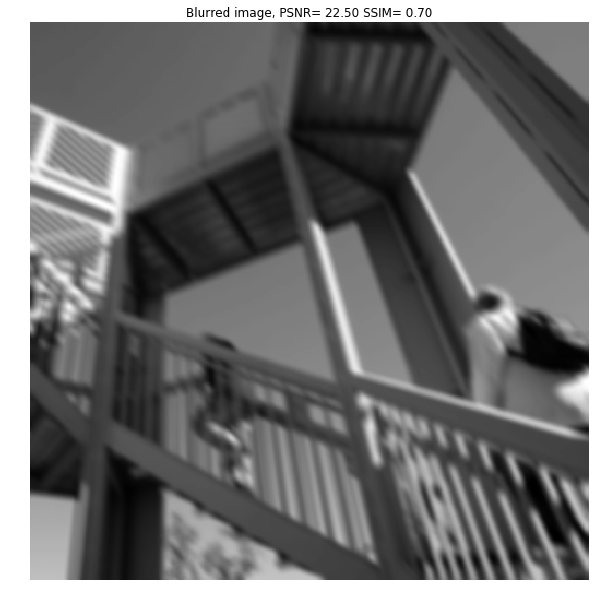

In [59]:
"""
  Perform convolution with gaussian kernel
"""
blurred=A(xbar)
stddev = 10
psnrBlurred = measure.compare_psnr(xbar, blurred, dynamic_range=dyn)
ssimBlurred = measure.compare_ssim(xbar, blurred, win_size=5, dynamic_range=dyn)

#Plot
plt.figure(2,figsize=(10,10))
plt.title("Blurred image, PSNR= "+("%.2f" % psnrBlurred)+
  " SSIM= "+("%.2f" % ssimBlurred))
plt.imshow(blurred, interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")

In [60]:
def GetLNormThroughPowerMethod(init,nbIter):
  """
    Perform a few iteration of the power method in order to obtain
    the maximum eigenvalue of the L^*L operator
  """
  x=init.copy()
  for i in range(nbIter):
    x = AT(A(x))
    s = np.linalg.norm(x)
    x /= s
  return np.sqrt(s)

def prox_f(x) :
  """
  """
  return x

def prox_g_conj (u, y, gamma) :
  """
  """
  return (u-gamma*y)/(gamma+1.)

In [65]:
Lnorm = GetLNormThroughPowerMethod(AT(blurred),10)*1.1 #take 10% margin
tau = 1./Lnorm
sigma = 1./Lnorm
rho = 1. #rho > 1 allows to speed up through momentum effect
nbIter = 200

xk = np.zeros_like(AT(blurred))  #primal var at current iteration
x_tilde = np.zeros_like(xk)  #primal var estimator
uk = np.zeros_like(blurred) #Dual variable
primObj = np.zeros(nbIter)
dualObj = np.zeros_like(primObj)
for iter in range(nbIter):  # iter goes from 0 to nbIter-1
  uk = prox_g_conj( uk + sigma * A(x_tilde), blurred, sigma )
  dualObj[iter] = -0.5*np.linalg.norm(uk)**2 - np.dot(uk.flatten(),blurred.flatten())
  xk1 = xk
  xk = prox_f( xk - tau * AT(uk) )
  x_tilde = xk + rho*( xk - xk1 )
  primObj[iter] = np.linalg.norm(A(xk)-blurred)**2

#Evaluate quality
psnrXk = measure.compare_psnr(xbar, xk, dynamic_range=dyn)
ssimXk = measure.compare_ssim(xbar, xk, win_size=5, dynamic_range=dyn)

(-0.5, 511.5, 511.5, -0.5)

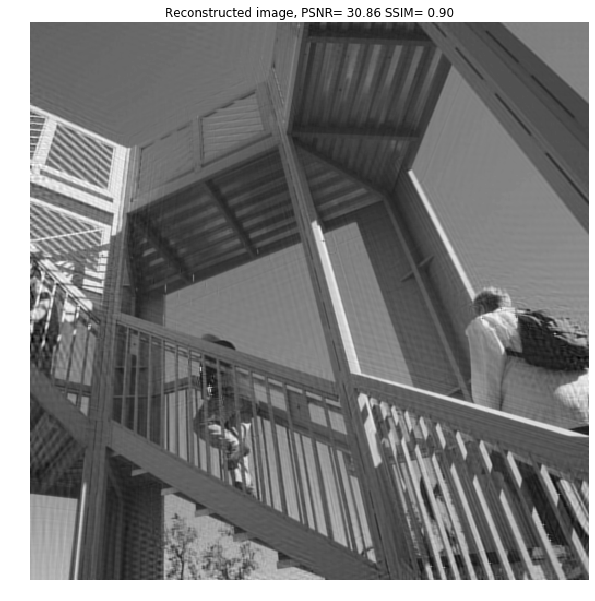

In [66]:
#Show reconstruction
plt.figure(3,figsize=(10,10))
plt.title("Reconstructed image, PSNR= "+("%.2f" % psnrXk)+
  " SSIM= "+("%.2f" % ssimXk))
plt.imshow(xk, interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")

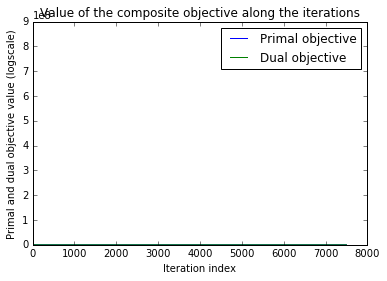

In [67]:
#Show convergence of primal/dual
plt.figure(4)
plt.xlabel("Iteration index")
plt.ylabel("Primal and dual objective value (logscale)")
plt.plot(range(nbIter),primObj,label="Primal objective")
plt.plot(range(nbIter),dualObj,label="Dual objective")
plt.title("Value of the composite objective along the iterations")
plt.legend()

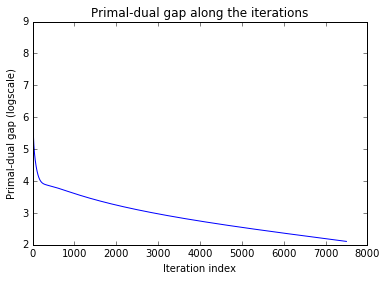

In [68]:
#Show that PD gap is numerically close to 0
plt.figure(5)
plt.xlabel("Iteration index")
plt.ylabel("Primal-dual gap (logscale)")
plt.plot(range(nbIter),np.log10(np.abs(primObj-dualObj)))
plt.title("Primal-dual gap along the iterations")
plt.show()

## Discussion

Obviously, this method does not seem to perform very well, and the primal-dual gap decrease rate is extremely slow.

## Reformulation of the problem with Forward Backward strategy

As the Chambolle-Pock approach, by taking into account the linear operator A did not performed well, one can try to drop this features, and instead try to set up the more simple forward backward strategy seen in the notebook called ForwardBackwardDual.

We recall this strategy:

We are concerned with the minimization of composite problems of the form 

\begin{align*}
    \underset{x \in \mathbb{R}^k}{min} \quad f(x) + g(Lx)
\end{align*}

whose dual objective reads, as seen in the previous part:

\begin{align*}
    \underset{u \in \mathbb{R}^n}{min} \quad f^*( -L^* u ) + g^*(u)
\end{align*}
    
We now assume that $f$ is $\beta$-strongly convex. Then, $f^*$ is differentiable  and its gradient is $\beta$-Lipschitz continuous.

We assume that the function $g$ is simple, in the sense that one can apply the proximity operator $\mathrm{prox}_{\gamma g}$
for any $\gamma > 0$.

Then, $G=g^*$ is simple as well, because of the Moreau identity

\begin{align*}
    x = \mathrm{prox}_{\gamma g^*}(x) + \gamma \mathrm{prox}_{\frac{g}{\gamma}} \left( \frac{x}{\gamma} \right)
\end{align*}


Since $F$ is smooth and $G$ is simple, one can apply the forward-backward algorithm, which reads, after initilizing $u^{0} \in \mathbb{R}^n$,

\begin{align*}
    u^{k+1} = \mathrm{prox}_{\gamma G}\left( u^{k} - \gamma \nabla F( u^{k} ) \right)
\end{align*}

The primal iterates are defined as

\begin{align*}
    x^{k} = \nabla f^*( -L^* u^{k} )
\end{align*}

So, we can write the algorithm in the primal-dual form

\begin{align*}
    x^{k} &= \nabla f^*( -L^* u^{k} )\\
    u^{k+1} &= \mathrm{prox}_{\gamma g^*}\left( u^{k} + \gamma Lx^{k} \right)
\end{align*}


If $0< \gamma < \frac{2}{\beta\|L\|^2}$, $x^{k}$ converges to a primal solution $x^\star$ and $u^{(k)}$ converges to a dual solution $u^\star$.

## Mapping the forward backward scheme to our problem

In this part, we will try to put the least square objective in the $f$ part of the proximal splitting scheme: $f(x) = \|Ax-y\|_2^2$.
We also set $g$ to be a trivial function: $g(x)=0$ and the linear mapping $L$ to be the identity: $L=Id$

### Convex conjugate of $f$

Let

\begin{align}
    F^*(u) &= \underset{z \in \mathbb{R}^k}{max} \quad \langle u,z \rangle - f(z)\\
    &= \underset{z \in \mathbb{R}^k}{max} \quad \langle u,z \rangle - \frac{1}{2}\|Az-y\|_2^2
\end{align}

with

\begin{align*}
    c(z) &= \quad \langle u,z \rangle - \frac{1}{2}\|Az-y\|_2^2 \\
    &= \quad \langle u,z \rangle - \frac{1}{2} \left( \| Az,Az \|_2^2 +
    \|y\|_2^2 + \langle Az,y rangle \right)
\end{align*}

This nice concave function can be derived in order to find its critical point:

\begin{align*}
    \frac{\partial c}{\partial z} &= 0 \\
    u - A^t A z - A^t y &= 0 \\
    A^t A z &= u - A^t y \\
    z &= (A^t A)^{-1} \left( u - A^t y \right)
\end{align*}

Reinjecting this expression in $ F^*(u)$ gives:

\begin{align*}
    F^*(u) &= \langle u,(A^t A)^{-1} \left( u - A^t y \right) \rangle -
    \frac{1}{2}\|A \left(A^t A\right)^{-1} \left( u - A^t y \right) -y\|_2^2
\end{align*}

### Derivative of $F^*$

As it will be needed for the forward/backward algorithm, we will try compute  $\nabla F^*$, the derivative of the convex conjugate of $f$.

First, in order to simplify expression, we define $\left(A^t A\right)^{-1} = P$ and $\left(A^t A\right)^{-1}A^t y = PA^t y = \lambda$
Lets use these shorthand to express $F^*$:

\begin{align*}
    F^*(u) &= \langle u,P ( u - A^t y ) \rangle - \frac{1}{2}\|A P ( u - A^t y ) -y\|_2^2 \\
    &= \langle u,Pu \rangle - \langle u,\lambda \rangle - \frac{1}{2} \| APu - A\lambda - y\|_2^2 \\
\end{align*}

So that the derivative gives:

\begin{align*}
    \frac{\partial F^*}{\partial u} &= - \lambda - \left( P^t A^t APu - P^t A^t (A\lambda+y) \right) \\
\end{align*}

### Convex conjugate of $g$

As seen previously, $g$ is the trivial function $g(x)=0$, its proximity operator is the identity: $\mathrm{prox}_{\gamma g}(x) = x$. Its convex conjugate reads $G^*(u)= \underset{z}{max} \quad \langle u, z \rangle_{\mathbb{R}^n}$ which reduces to the constraint $u=0$ that translate into the indicator function of 0 : $\delta_0(u)$ \\

Thanks to Moreau identity, we can esily derive the proximity operator of $G^*$:

\begin{align*}
    x &= \mathrm{prox}_{\gamma G^*}(x) + \gamma \mathrm{prox}_{\frac{g}{\gamma}} \left( \frac{x}{\gamma} \right) \\
    \mathrm{prox}_{\gamma G^*}(x) &= x - \gamma \mathrm{prox}_{\frac{g}{\gamma}} \left( \frac{x}{\gamma} \right) \\
    \mathrm{prox}_{\gamma G^*}(x) &= x - \gamma Id \left( \frac{x}{\gamma} \right)\\
    \mathrm{prox}_{\gamma G^*}(x) &= 0
\end{align*}


## Wrapping up

We recall our primal objective:

\begin{align*}
    & f(x) + g(Lx)\\
    =& \frac{1}{2} \|Ax-y\|_2^2 + g(x)\\
    =& \frac{1}{2} \|Ax-y\|_2^2
\end{align*}

The dual objective reads
\begin{align*}
    & F^*( -L^* u ) + G^*(u)\\
    =& F^*( -u ) + \delta_0(u)\\
    =& \langle u,Pu \rangle + \langle u,\lambda \rangle - \frac{1}{2} \| APu + A\lambda + y\|_2^2 + \delta_0(u)
\end{align*}

With $P = \left(A^t A\right)^{-1}$ and $\lambda = \left(A^t A\right)^{-1}A^t y$

We can now derive our forward backward algorithm, for the primal update:

\begin{align*}
    x^{k} &= \nabla f^*( -L^* u^{k} )\\
    x^{k} &= - \lambda - \left( -P^t A^t APu^{k} - P^t A^t (A\lambda+y) \right)
\end{align*}

And the dual update
\begin{align*}
    u^{k+1} &= \mathrm{prox}_{\gamma g^*}\left( u^{k} + \gamma Lx^{k} \right)\\
    u^{k+1} &= 0
\end{align*}

We see that the dual variable will always be equal to zero, so that many equation simplifies:

The dual objective now reads
\begin{align*}
    &= \langle u,Pu \rangle + \langle u,\lambda \rangle - \frac{1}{2} \| APu + A\lambda + y\|_2^2 + \delta_0(u) \\
    &= - \frac{1}{2} \| A \lambda + y\|_2^2 \\
    &= - \frac{1}{2} \| A \left(A^t A\right)^{-1}A^t y + y\|_2^2
\end{align*}

and the forward backward algorithm reads
\begin{align*}
    x^{k} &= - \lambda + P^t A^t (A\lambda+y)\\
    u^{k+1} &= 0
\end{align*}